# PCA with Iris Dataset

## 1. Imports

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pickle

# For visualization with Yellowbrick
from yellowbrick.features import PCA as YBPCA

# 2. Load dataset


In [41]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 3. Pairwise plot of original features

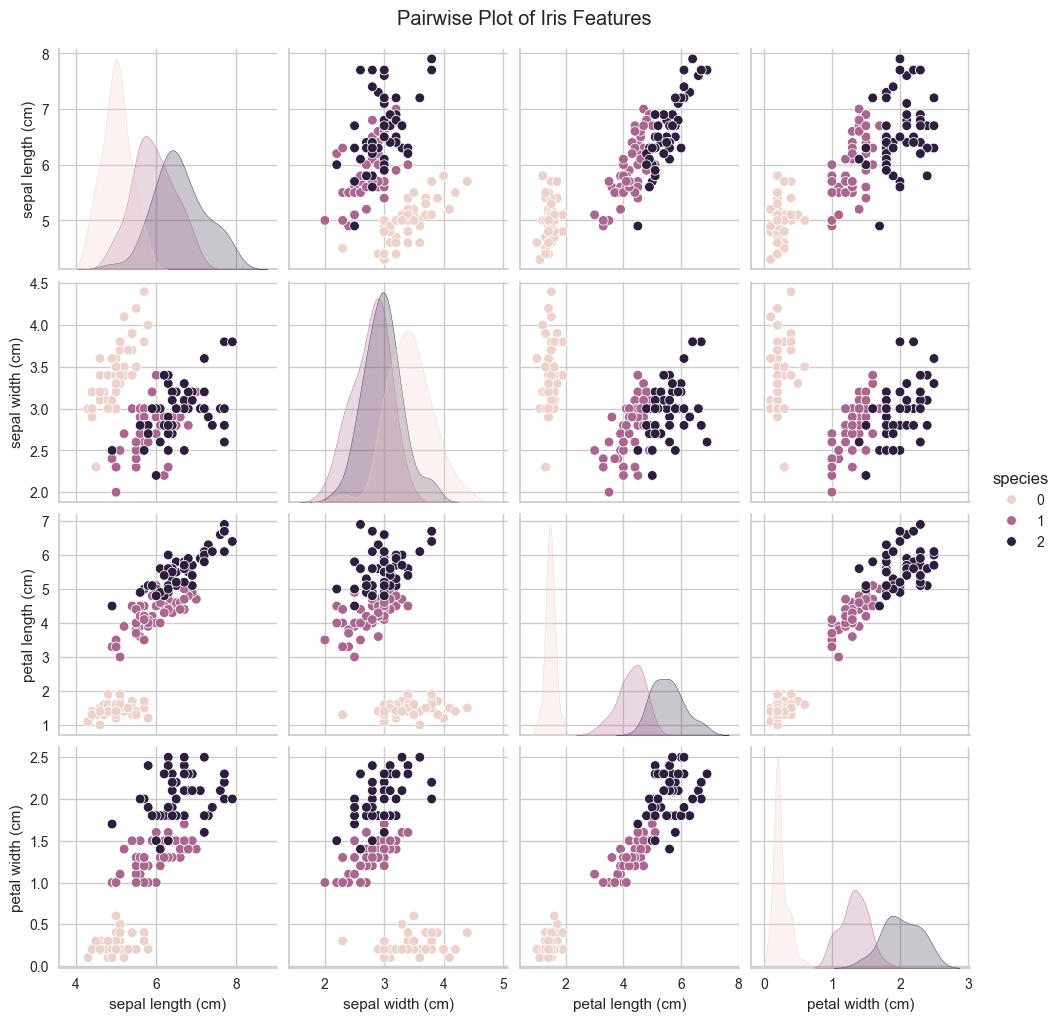

In [42]:
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Pairwise Plot of Iris Features", y=1.02)
plt.show()

# 4. Standardize features and fit PCA


Explained variance ratio by each principal component: [0.72962445 0.22850762 0.03668922 0.00517871]


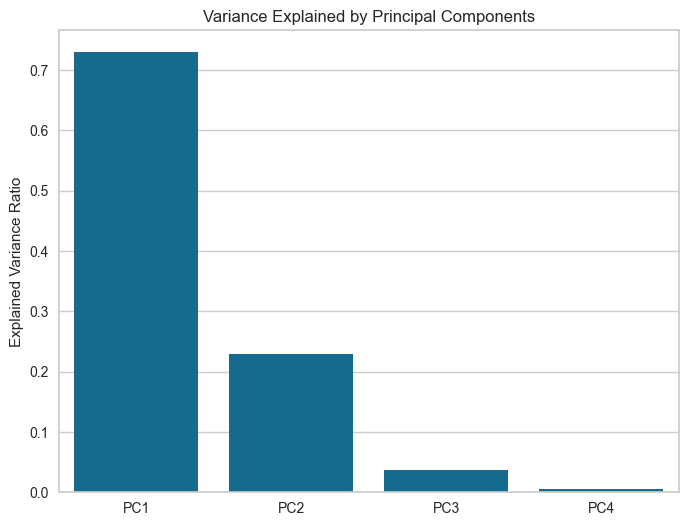

In [43]:
X = StandardScaler().fit_transform(df[iris.feature_names])

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Explained variance
explained_var = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:", explained_var)


# Barplot of explained variance
plt.figure(figsize=(8,6))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_var))], y=explained_var)
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Explained by Principal Components")
plt.show()

# 5. Scatter plot of PC1 vs PC2


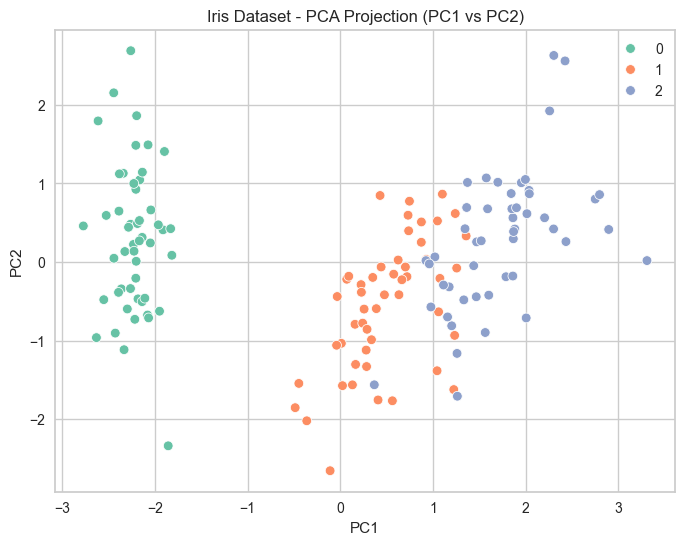

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=iris.target, palette="Set2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris Dataset - PCA Projection (PC1 vs PC2)")
plt.show()

# 6. Yellowbrick visualization of PCA


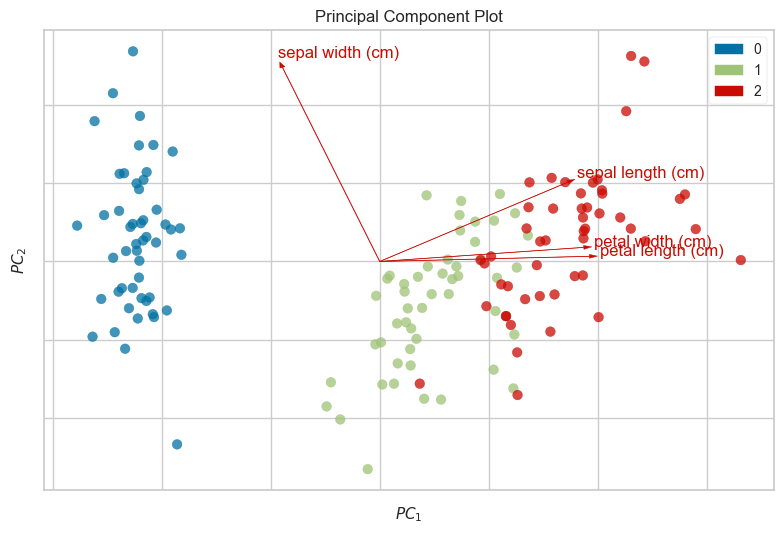

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [45]:

visualizer = YBPCA(
    scale=True,
    proj_features=True,
    proj_dim=2,
    features=iris.feature_names  # ✅ use original feature names
)

visualizer.fit_transform(X, iris.target)
visualizer.show()


# 7. Persist PCA model with pickle



In [46]:
# Fit scaler + PCA together
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[iris.feature_names])

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Save both scaler and PCA
with open("pca_model.pkl", "wb") as f:
    pickle.dump((scaler, pca), f)

# Load them back
with open("pca_model.pkl", "rb") as f:
    loaded_scaler, loaded_pca = pickle.load(f)

# Example handcrafted vector (4 features: sepal length, sepal width, petal length, petal width)
sample_vector = pd.DataFrame([[4.1, 3.5, 1.4, 5.2]], columns=iris.feature_names)

# Scale and project using the loaded scaler + PCA
sample_vector_scaled = loaded_scaler.transform(sample_vector)
projected = loaded_pca.transform(sample_vector_scaled)

print("Projected vector in PCA space:", projected)

Projected vector in PCA space: [[ 0.8215977   0.46330371 -4.91871249 -3.15368491]]


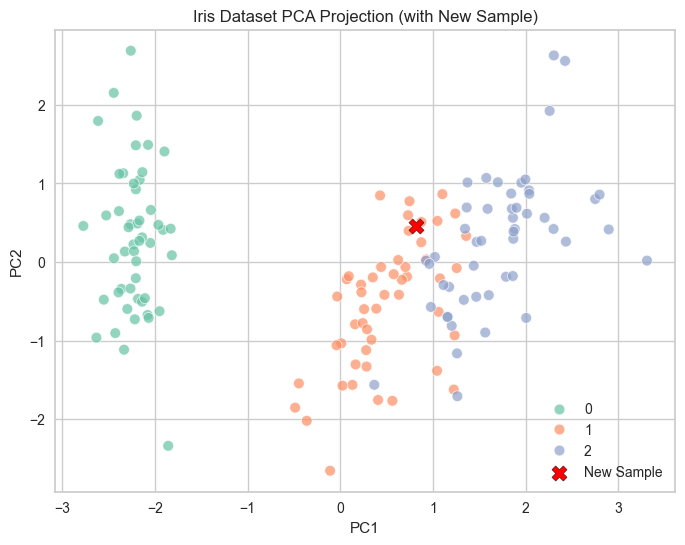

In [47]:
# Project all original Iris data using the fitted scaler + PCA
X_scaled_all = loaded_scaler.transform(df[iris.feature_names])
X_pca_all = loaded_pca.transform(X_scaled_all)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(X_pca_all, columns=["PC1", "PC2", "PC3", "PC4"])
df_pca["species"] = df["species"]

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="species",
    data=df_pca,
    palette="Set2",
    alpha=0.7,
    s=60
)

# Overlay the new sample
plt.scatter(
    projected[:,0], projected[:,1],
    color="red", s=120, edgecolor="black", marker="X", label="New Sample"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris Dataset PCA Projection (with New Sample)")
plt.legend()
plt.show()


# Another Example (Glass dataset)

In [48]:
# PCA with Glass Dataset
# ----------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import pickle

# Load Glass dataset from OpenML
glass = fetch_openml(name="glass", version=1, as_frame=True)
df = glass.frame

print("Shape:", df.shape)
df.head()



Shape: (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,build wind float
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,vehic wind float
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,build wind float
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,build wind non-float


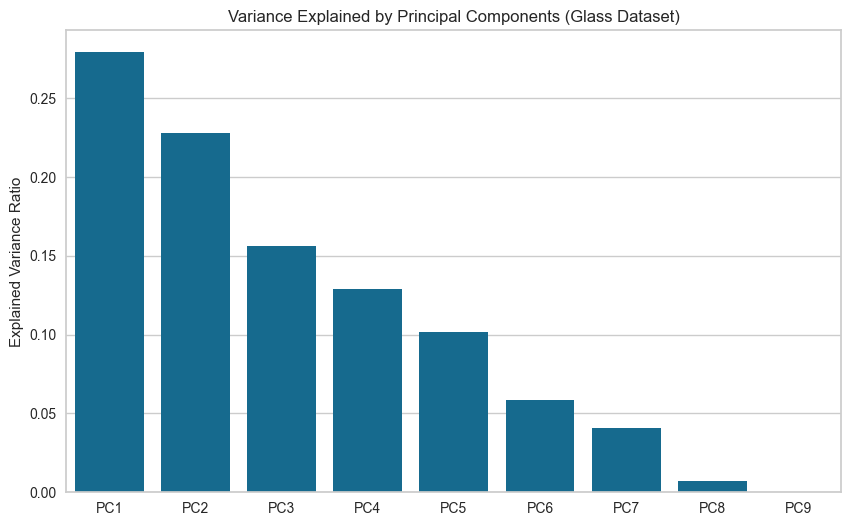

In [49]:
# Separate features and target
X = df.drop(columns=["Type"])
y = df["Type"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA(n_components=X.shape[1])  # keep all components
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(10,6))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_var))], y=explained_var)
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Explained by Principal Components (Glass Dataset)")
plt.show()


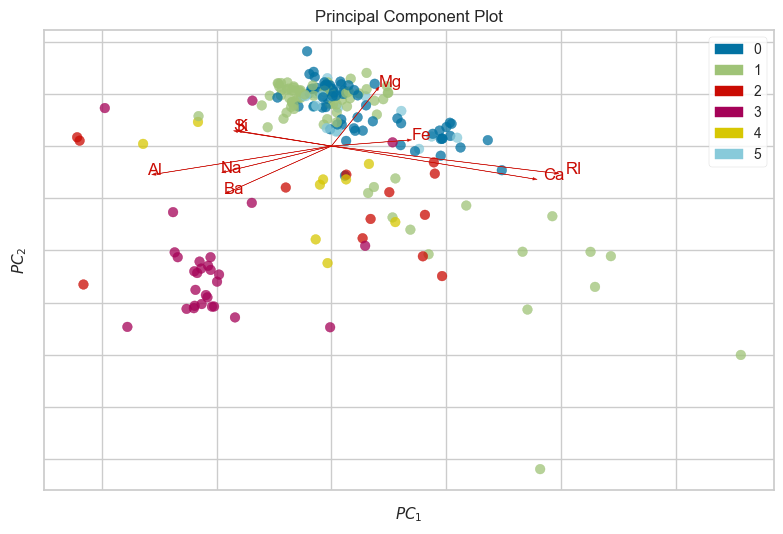

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [50]:
from sklearn.preprocessing import LabelEncoder
from yellowbrick.features import PCA as YBPCA

# Encode target labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Yellowbrick PCA visualization with encoded targets
visualizer = YBPCA(
    scale=True,
    proj_features=True,
    proj_dim=2,
    features=X.columns  # original feature names
)

visualizer.fit_transform(X, y_encoded)
visualizer.show()
